In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv("decision tree example.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [113]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [114]:
df['Classification'] = df['Classification']-1
y = df['Classification']
X= df.drop('Classification', axis = 'columns')

y=y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.15, random_state = 50)
print(X_test.shape)
print(X_train.shape)

(18, 9)
(98, 9)


<Figure size 2000x1600 with 0 Axes>

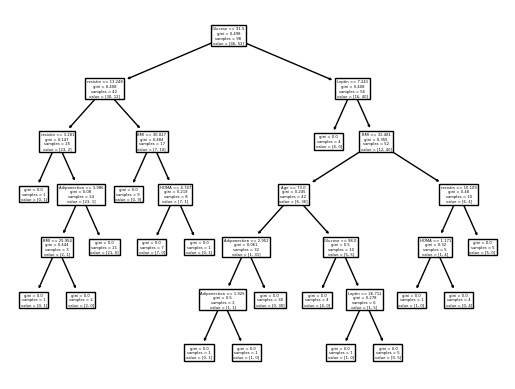

<Figure size 2000x1600 with 0 Axes>

In [115]:
#train model bang decision tree
from sklearn.tree import DecisionTreeClassifier
features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponection', 'resistin', 'MCP.1']
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train, y_train)
#bieu dien
from sklearn import tree
tree.plot_tree(dtree, feature_names = features)
plt.figure(figsize = (20,16))

Text(95.72222222222221, 0.5, 'Truth')

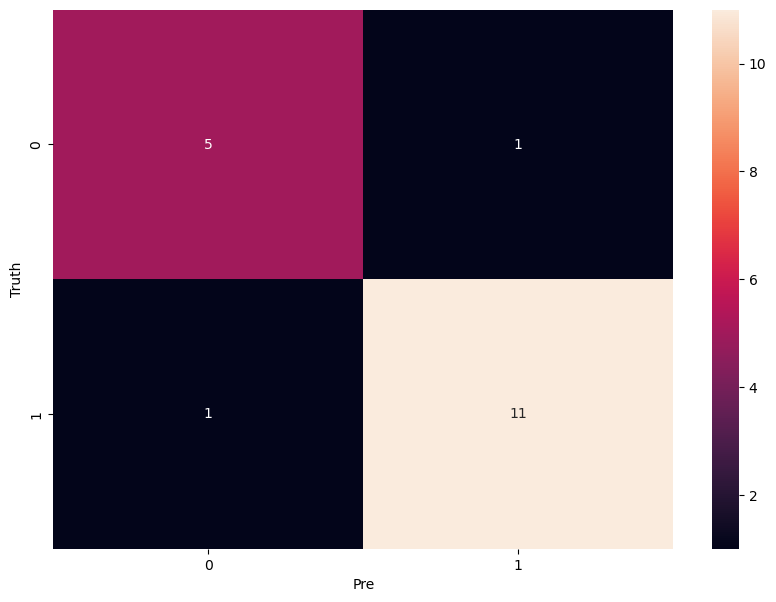

In [116]:
#quan sat tren confusion matrix
from sklearn.metrics import confusion_matrix
pre = dtree.predict(X_test)
cm = confusion_matrix(y_test, pre)
#bieu do de hieu confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Pre')
plt.ylabel('Truth')


In [117]:
'''Doi voi bai toan regression ta co the dung DecisionTreeRegression'''

'Doi voi bai toan regression ta co the dung DecisionTreeRegression'

In [118]:
from sklearn.tree import DecisionTreeRegressor

df2 = pd.read_csv('decision tree exam2.csv')
print(df2.head())
df2['Product'].value_counts()

           Product  Cost  Profit
0     'Asset Flip'   100    1000
1     'Text Based'   500    3000
2   'Visual Novel'  1500    5000
3   '2D Pixel Art'  3500    8000
4  '2D Vector Art'  5000    6500


'Asset Flip'              1
'Text Based'              1
'Visual Novel'            1
'2D Pixel Art'            1
'2D Vector Art'           1
'Strategy'                1
'First Person Shooter'    1
'Simulator'               1
'Racing'                  1
'RPG'                     1
'Sandbox'                 1
'Open-World'              1
'MMOFPS'                  1
'MMORPG'                  1
Name: Product, dtype: int64

In [119]:
product = pd.get_dummies(df2['Product'])
_df2 = pd.concat([df2.drop('Product', axis = 'columns'), product], axis = 'columns')
_df2.head()

,Cost,Profit,'2D Pixel Art','2D Vector Art','Asset Flip','First Person Shooter','MMOFPS','MMORPG','Open-World','RPG','Racing','Sandbox','Simulator','Strategy','Text Based','Visual Novel'
0,100,1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,500,3000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1500,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3500,8000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5000,6500,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
_y = _df2['Profit']
_X = _df2.drop('Profit', axis = 'columns')
_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size = 0.3, random_state = 40)
print(_X.shape)

(14, 15)


Text(95.72222222222221, 0.5, 'Truth')

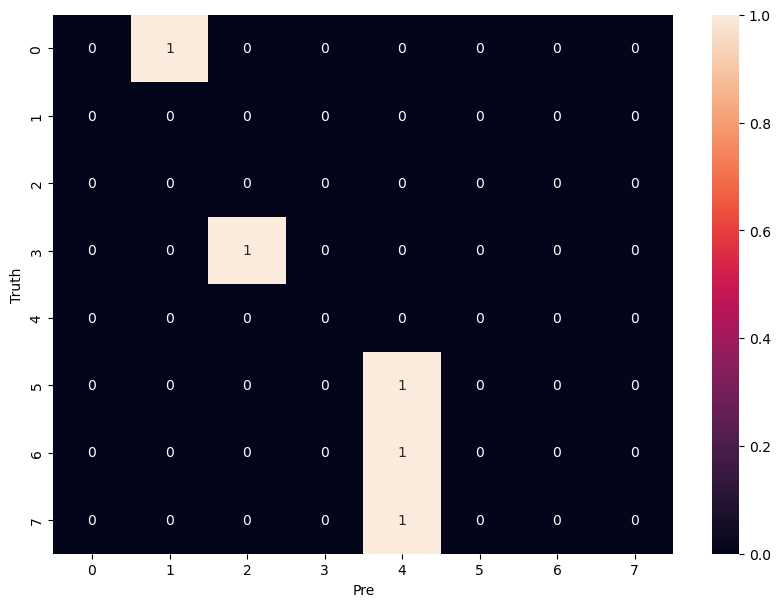

In [121]:
_dtree = DecisionTreeRegressor()
_dtree.fit(_X_train, _y_train)
_pre = _dtree.predict(_X_test)
_cm = confusion_matrix(_y_test, _pre)
#bieu do de hieu confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(_cm, annot = True)
plt.xlabel('Pre')
plt.ylabel('Truth')

<Figure size 10000x9000 with 0 Axes>

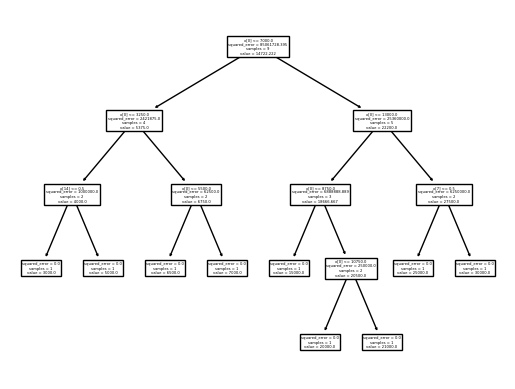

<Figure size 10000x9000 with 0 Axes>

In [131]:

#bieu dien
tree.plot_tree(_dtree)
plt.figure(figsize=(100,90))